# **EDA**

### **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np


### **2.Load the dataset**

In [ ]:
df = pd.read_csv("survey.csv")


### **3. Preview and Understand the Data**

In [ ]:
df.head()           # Show first 5 rows
df.shape            # Check number of rows and columns
df.columns          # List column names
df.info()           # Data types and non-null counts
df.describe()       # Summary stats for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### **4. Check for missing values**

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
comments,1095
state,515
work_interfere,264
self_employed,18
Gender,0
Timestamp,0
Age,0
family_history,0
treatment,0
no_employees,0


### **5. Data Cleaning**

**a. Clean column names**

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


**b. Clean unrealistic age values**

In [ ]:
df = df[(df['age'] >= 18) & (df['age'] <= 100)]


**c. Normalize gender values**

In [ ]:
df['gender'] = df['gender'].str.lower().str.strip()
df['gender'] = df['gender'].replace([
    'female', 'f', 'woman', 'cis female', 'femake', 'female ',
    'cis-female/femme'
], 'female')

df['gender'] = df['gender'].replace([
    'male', 'm', 'man', 'cis male', 'male ', 'malr'
], 'male')

df['gender'] = df['gender'].apply(lambda x: 'other' if x not in ['male', 'female'] else x)


/tmp/ipython-input-69-1014835837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].str.lower().str.strip()
/tmp/ipython-input-69-1014835837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace([
/tmp/ipython-input-69-1014835837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

### **6. Explore Categorical Columns**

In [ ]:
df['gender'].value_counts()
df['treatment'].value_counts()
df['remote_work'].value_counts()
df['no_employees'].value_counts()


,count
no_employees,
6-25,289
26-100,288
More than 1000,281
100-500,175
1-5,158
500-1000,60


### **7. Group-wise Statistics**

**a. Treatment by Gender**

In [ ]:
df.groupby('gender')['treatment'].value_counts(normalize=True)


gender  treatment
female  Yes          0.693878
        No           0.306122
male    No           0.545641
        Yes          0.454359
other   Yes          0.612903
        No           0.387097
Name: proportion, dtype: float64

**b. Treatment by Remote work**

In [ ]:
df.groupby('remote_work')['treatment'].value_counts(normalize=True)


remote_work  treatment
No           No           0.503409
             Yes          0.496591
Yes          Yes          0.525606
             No           0.474394
Name: proportion, dtype: float64

**c. Treatment by Company size (number of employees)**





In [ ]:
df.groupby('no_employees')['treatment'].value_counts(normalize=True)


no_employees    treatment
1-5             Yes          0.556962
                No           0.443038
100-500         Yes          0.542857
                No           0.457143
26-100          Yes          0.517361
                No           0.482639
500-1000        No           0.550000
                Yes          0.450000
6-25            No           0.560554
                Yes          0.439446
More than 1000  Yes          0.519573
                No           0.480427
Name: proportion, dtype: float64

### **8. Feature Engineering**

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])

/tmp/ipython-input-74-1752383628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])


### **9. Correlation analysis**

In [ ]:
df.corr(numeric_only=True)

,age
age,1.0


### **10.Export cleaned data**

In [ ]:
df.to_csv("cleaned_survey.csv", index=False)

# **Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


**a. Age Distribution**

<Axes: xlabel='age', ylabel='Count'>

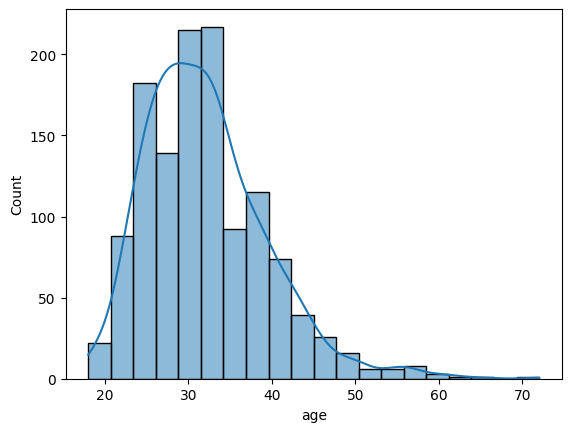

In [ ]:
sns.histplot(df['age'], kde=True, bins=20)


**b. Gender Count**

<Axes: xlabel='gender', ylabel='count'>

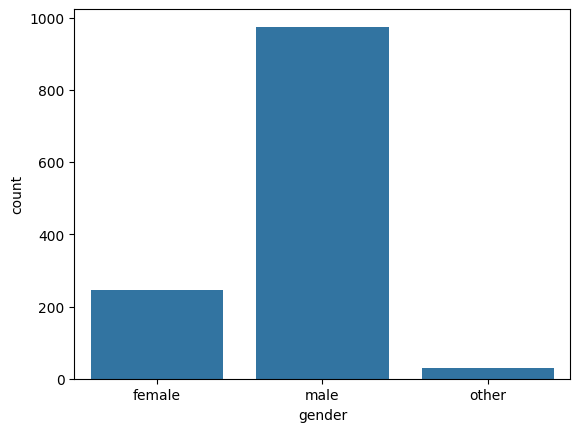

In [ ]:
sns.countplot(x='gender', data=df)


**c. Treatment Count**

<Axes: xlabel='treatment', ylabel='count'>

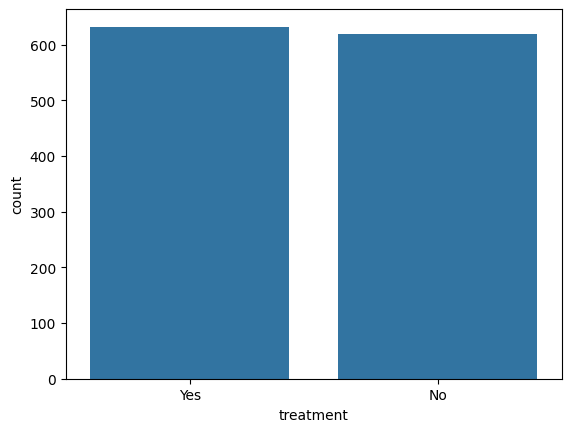

In [ ]:
sns.countplot(x='treatment', data=df)


**d. Treatment by Gender**

<Axes: xlabel='gender', ylabel='count'>

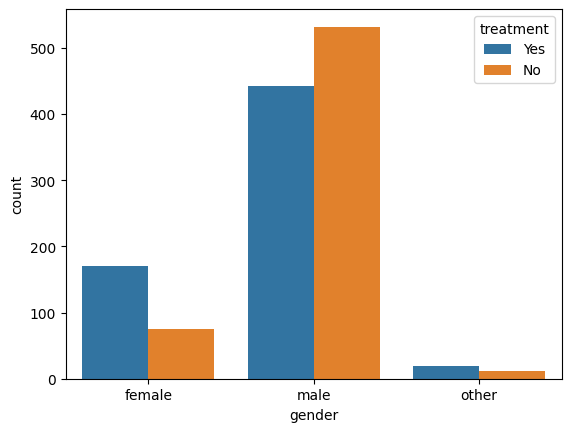

In [ ]:
sns.countplot(x='gender', hue='treatment', data=df)


**e. Boxplot: Age vs Treatment**

<Axes: xlabel='treatment', ylabel='age'>

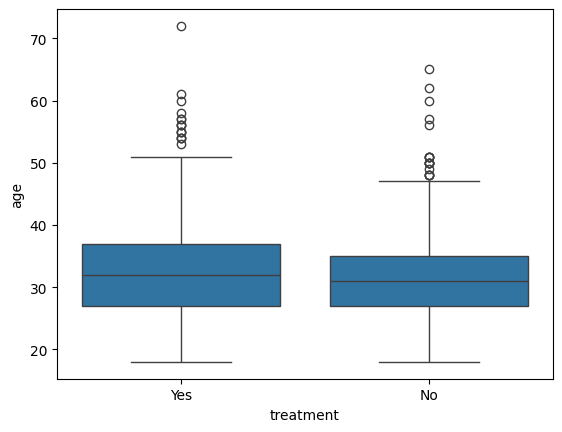

In [ ]:
sns.boxplot(x='treatment', y='age', data=df)


**f. Company Size vs Treatment**

<Axes: xlabel='no_employees', ylabel='count'>

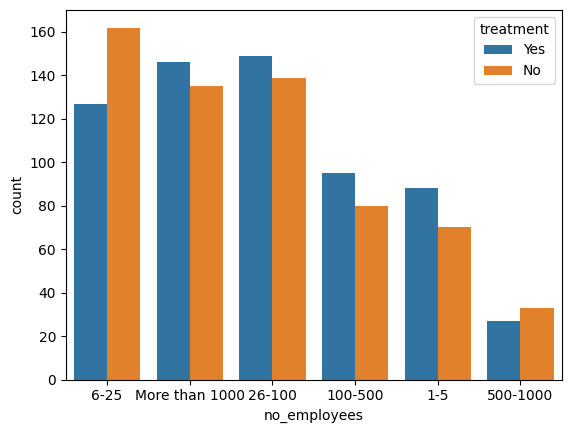

In [ ]:
sns.countplot(x='no_employees', hue='treatment', data=df)


**g. Remote Work vs Treatment**

<Axes: xlabel='remote_work', ylabel='count'>

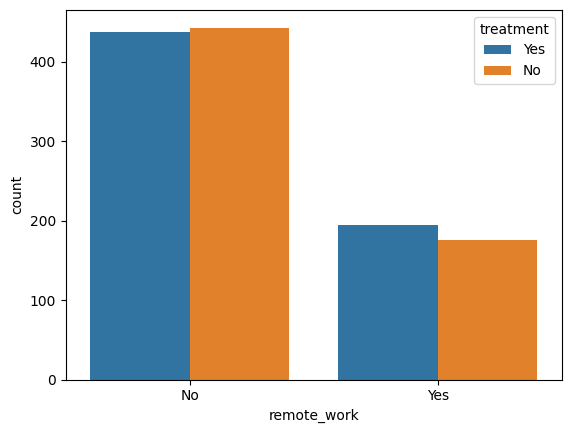

In [ ]:
sns.countplot(x='remote_work', hue='treatment', data=df)


**h. Heatmap for Correlations**

<Axes: >

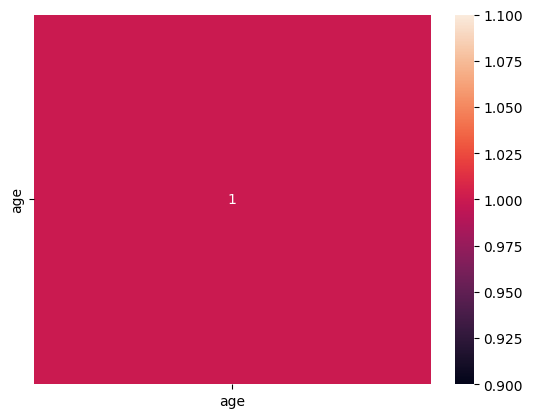

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


# **Predictive Modeling (Binary Classification)**

**a. Label Encoding** : categorical variables into numeric format

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['treatment_label'] = le.fit_transform(df['treatment'])  # Yes → 1, No → 0


**b. Feature Selection**



In [ ]:
features = ['age', 'gender', 'remote_work', 'no_employees', 'family_history', 'care_options', 'benefits']


In [ ]:
X = pd.get_dummies(df[features], drop_first=True)
y = df['treatment_label']


**c. Train-Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**d. Train a Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

**e. Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.68      0.64       113
           1       0.71      0.64      0.67       138

    accuracy                           0.66       251
   macro avg       0.66      0.66      0.66       251
weighted avg       0.66      0.66      0.66       251

